In [1]:
import openai
import pennylane as qml
from PIL import Image
import numpy as np

In [2]:
from key import api_key

In [3]:
from openai import OpenAI

client = OpenAI(api_key=api_key)

def prob_image_arr(arr, openai_api_key):
    # Use OpenAI API to interpret the text
    openai.api_key = openai_api_key

    try:
        response = client.chat.completions.create(
            model="gpt-3.5-turbo",
            messages=[
            #   {
            #      "role": "system",
            #      "content": "The model is tasked with analyzing a 2D binary array. It should output '1' if the '1's in the array form a perfect rectangle, without any breaks or irregularities. If the '1's do not form a perfect rectangle, the model should output '0'. This binary output should be based solely on the geometric arrangement of '1's within the array."
            #   },
            {
             "role": "system",
               "content": "The model is tasked to receive a 2D binary array consisting of 0s and 1s, with the 1s forming a specific shape. It should analyze this shape and calculate a score from 0 to 1 that indicates how closely this shape resembles a rectangle. A score of 1 denotes an exact rectangle, while a score of 0 indicates no resemblance to a rectangle. The model should focus on the spatial arrangement and continuity of the 1s to determine this score. The output should only be the score with a single number as output without any extra text as explanation."

            # "content": "The model's task is to analyze a 2D binary array and provide a numerical score between 0 and 1. This score represents how closely the '1's in the array resemble a rectangle, with 1 being a perfect rectangle and 0 indicating no resemblance. The model should output only the score, without any accompanying explanation."
            },
            #   {
            #      "role": "system",
            #      "content": "The model is tasked with analyzing a 2D binary array and providing a score between 0 and 1. This score should reflect how closely the arrangement of '1's within the array resembles a rectangle. A score of 1 indicates a perfect rectangle, while a score closer to 0 suggests less resemblance to a rectangle. The model should consider factors such as the continuity, alignment, and proportion of '1's in determining this score."
            #   },
              {"role": "user", "content": f"{arr}"}
            ]
        )
        # print(response)
        content = content = response.choices[0].message.content
        return content
    except Exception as e:
        return f"Error in OpenAI API call: {e}"


In [4]:
# is_arr = prob_image_arr(input_arr, api_key)
# print(is_arr)

In [5]:
import pennylane as qml
from scipy.optimize import minimize
# from pennylane import numpy as np




In [6]:
n_qubits = 8
dev = qml.device('default.qubit', wires=n_qubits)

In [7]:
def find_n_largest_numbers(arr, n):
    # Find the indices of the n largest elements
    indices = np.argsort(arr)[-n:]
    # Find the n largest elements
    largest_elements = arr[indices]
    return largest_elements, indices

def indices_to_binary(indices):
    # Convert each index to binary and ensure it's 8 bits
    return [format(index, f'0{n_qubits}b') for index in indices]

def int_to_binary(n, digits):
    binary_str = format(n, 'b')
    # Pad the binary string with leading zeros to ensure it has 'digits' length
    return binary_str.zfill(digits)

In [8]:
# Define the quantum circuit
@qml.qnode(dev)
def circuit(param,index):
    index = int_to_binary(index,n_qubits)
    for i, char in enumerate(index):
        if(char=='1'):
            qml.PauliX(wires=i)
        # qml.Hadamard(wires=i)
            
    qml.StronglyEntanglingLayers(weights=param, wires=range(n_qubits))
    # qml.BasicEntanglerLayers(weights=param, wires=range(n_qubits))
    # return qml.probs(wires=range(n_qubits))
    out = [qml.expval(qml.PauliZ(0)),qml.expval(qml.PauliZ(1)),qml.expval(qml.PauliZ(2)),qml.expval(qml.PauliZ(3)),qml.expval(qml.PauliZ(4)),qml.expval(qml.PauliZ(5)),qml.expval(qml.PauliZ(6)),qml.expval(qml.PauliZ(7))]
    # out = np.array(out)
    return out


In [9]:
def convert_to_int(nested_list):
    return [[int(element) for element in sublist] for sublist in nested_list]

def binary_array_to_png_and_display(binary_array, scale_factor=10):
    # binary_array = convert_to_int(binary_array)
    # Convert the binary array to a numpy array with values 0 and 255
    image_array = np.array(binary_array) * 255

    # Create an image object from the numpy array
    image = Image.fromarray(np.uint8(image_array), 'L')

    # Scale the image
    original_size = image.size
    scaled_size = tuple([dimension * scale_factor for dimension in original_size])
    scaled_image = image.resize(scaled_size, Image.NEAREST)
    display(scaled_image)


In [10]:
def feature_map(input_arr):
    """Flatten the 2D binary array into a 1D feature map."""
    return [item for sublist in input_arr for item in sublist]

def cosine_similarity(vec1, vec2):
    """Calculate the cosine similarity between two vectors."""
    vec1, vec2 = np.array(vec1), np.array(vec2)
    dot_product = np.dot(vec1, vec2)
    norm_vec1 = np.linalg.norm(vec1)
    norm_vec2 = np.linalg.norm(vec2)
    # if(norm_vec2*norm_vec1==0): return 0
    # similarity = dot_product / (norm_vec1 * norm_vec2)
    similarity = dot_product / (norm_vec1 )
    # similarity = dot_product
    return similarity

In [11]:
a = int_to_binary(4,5)
for i, char in enumerate(a):
    if(char=='1'):
        print(True)

True


In [12]:
# smiley_pattern = np.array([
#         [0, 0, 0, 0, 0, 0, 0, 0],
#         [0, 0, 1, 0, 0, 1, 0, 0],
#         [0, 0, 0, 0, 0, 0, 0, 0],
#         [0, 1, 0, 0, 0, 0, 1, 0],
#         [0, 0, 1, 1, 1, 1, 0, 0],
#         [0, 0, 0, 0, 0, 0, 0, 0],
#         [0, 0, 0, 0, 0, 0, 0, 0],
#         [0, 0, 0, 0, 0, 0, 0, 0]
#     ])

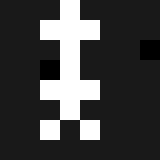

In [13]:

smiley_pattern = np.array([ 
        [0.1,0.1,0.1, 1,0.1,0.1,0.1,0.1],
        [0.1,0.1, 1, 1,1,0.1,0.1,0.1],
        [0.1,0.1,0.1, 1,0.1,0.1,0.1,0 ],
        [0.1,0.1,0, 1,0.1,0.1,0.1,0.1],
        [0.1,0.1, 1, 1, 1,0.1,0.1,0.1],
        [0.1,0.1,0.1, 1,0.1,0.1,0.1,0.1],
        [0.1,0.1, 1,0.1, 1,0.1,0.1,0.1],
        [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]])
binary_array_to_png_and_display(smiley_pattern,scale_factor=20)

smiley_pattern_vec = feature_map(smiley_pattern)

0: ────╭StronglyEntanglingLayers(M0)─┤  <Z>
1: ────├StronglyEntanglingLayers(M0)─┤  <Z>
2: ────├StronglyEntanglingLayers(M0)─┤  <Z>
3: ────├StronglyEntanglingLayers(M0)─┤  <Z>
4: ────├StronglyEntanglingLayers(M0)─┤  <Z>
5: ────├StronglyEntanglingLayers(M0)─┤  <Z>
6: ────├StronglyEntanglingLayers(M0)─┤  <Z>
7: ──X─╰StronglyEntanglingLayers(M0)─┤  <Z>
M0 = 
[[[0.13054074 0.89038428 0.02672938]
  [0.36542121 0.63445466 0.07220992]
  [0.12405093 0.32181485 0.03818526]
  [0.41000352 0.52554254 0.12238794]
  [0.44719296 0.81937247 0.72294322]
  [0.91605508 0.66555656 0.22355459]
  [0.18319991 0.48308583 0.38333748]
  [0.25901338 0.74949444 0.4668398 ]]

 [[0.54874699 0.83720874 0.70555092]
  [0.55971859 0.92775753 0.58646895]
  [0.59383794 0.35335362 0.79276423]
  [0.24908502 0.09969196 0.60317932]
  [0.08711815 0.61030283 0.54530318]
  [0.42233597 0.91906882 0.76611943]
  [0.59480887 0.09482382 0.41267695]
  [0.72717584 0.14072269 0.93991407]]

 [[0.08544872 0.83208967 0.78242107]
  [0.5014

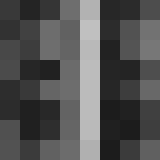

Current loss: 0.33196471773891384


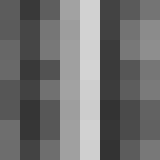

Current loss: 0.27168233849084666


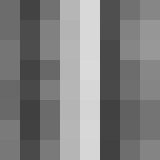

Current loss: 0.2518098712086231


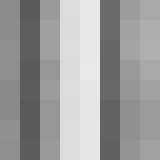

Current loss: 0.2192077290071877


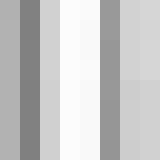

Current loss: 0.19059056028296564


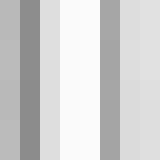

Current loss: 0.1869983688975422


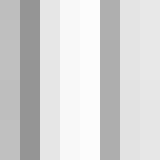

Current loss: 0.1851927335551701


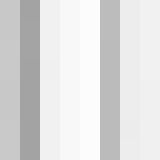

Current loss: 0.1823916343394428


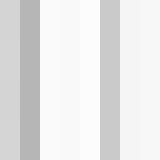

Current loss: 0.17907255984557868


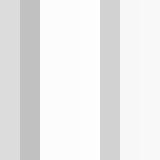

Current loss: 0.1772607313432819


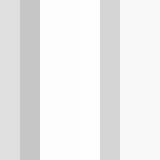

Current loss: 0.17654981131070863


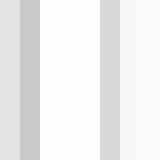

Current loss: 0.1762099292241504


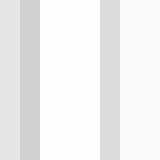

Current loss: 0.17568073839055826


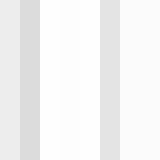

Current loss: 0.17489635315304722


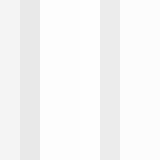

Current loss: 0.1741431338212415


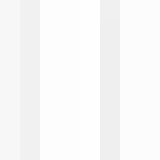

Current loss: 0.17371997564547306


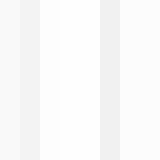

Current loss: 0.17351830395635867


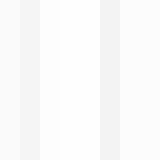

Current loss: 0.173325967897307


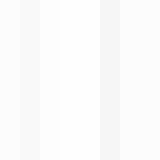

Current loss: 0.17303554546405492


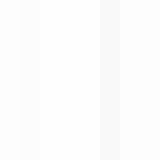

Current loss: 0.17272890920841497


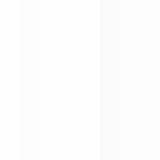

Current loss: 0.17255544737753023


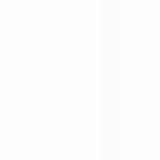

Current loss: 0.17248694203839773


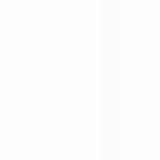

Current loss: 0.17243933133765785


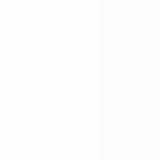

Current loss: 0.17237281771348703


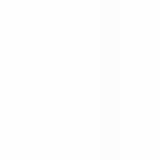

Current loss: 0.17231162099775135


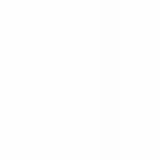

Current loss: 0.17228043438411247


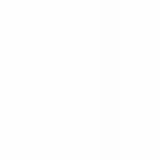

Current loss: 0.17226876239245417


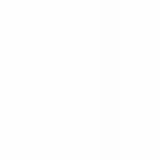

Current loss: 0.17225854484722158


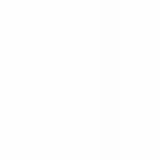

Current loss: 0.17224291290149252


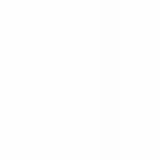

Current loss: 0.17222561597053146


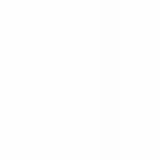

Current loss: 0.17221651533043822


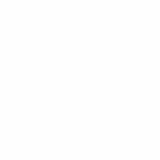

Current loss: 0.17221292452757014


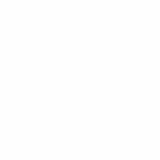

Current loss: 0.17221034553140094


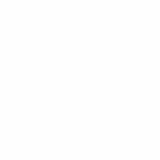

Current loss: 0.17220616660063315


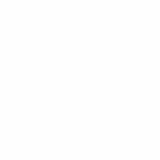

Current loss: 0.17219975826585718


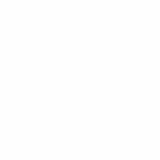

Current loss: 0.17219322851469757


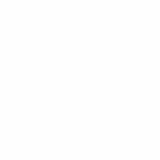

Current loss: 0.17218958424864658


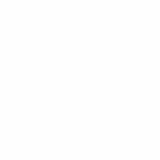

Current loss: 0.17218675594695954


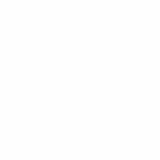

Current loss: 0.17218366113856298


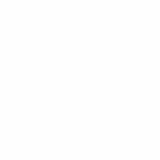

Current loss: 0.17217897787107608


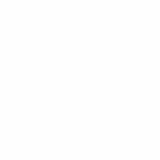

Current loss: 0.17217420259425134


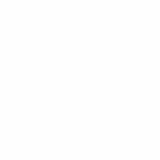

Current loss: 0.1721718682166684


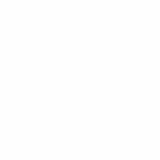

Current loss: 0.17217107785416572


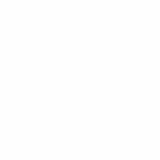

Current loss: 0.17217055498957665


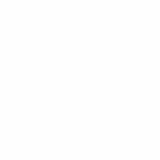

Current loss: 0.17216971580443774


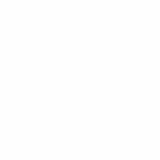

Current loss: 0.17216849192715156


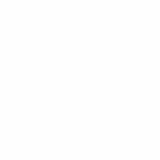

Current loss: 0.17216762230026528


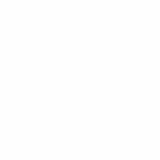

Current loss: 0.1721672949747453


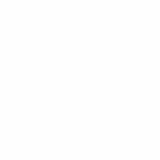

Current loss: 0.17216718041572807


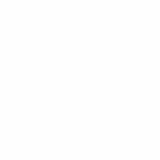

Current loss: 0.1721670770022817


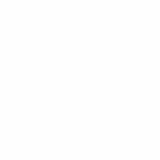

Current loss: 0.17216692191324606


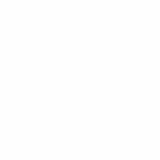

Current loss: 0.17216678244129002


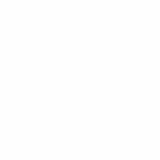

Current loss: 0.17216672962777485


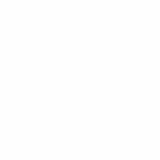

Current loss: 0.17216671714366683


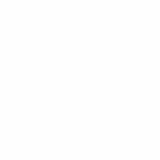

Current loss: 0.1721667108952866


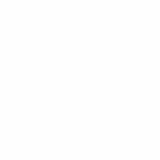

Current loss: 0.17216670101260678


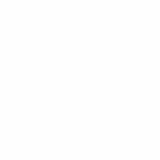

Current loss: 0.17216668824098136


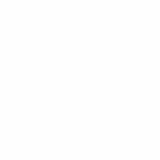

Current loss: 0.17216668187564563


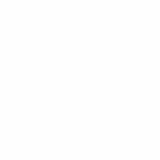

Current loss: 0.17216667912380307


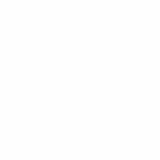

Current loss: 0.1721666775709111


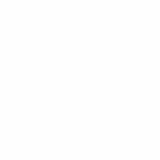

Current loss: 0.1721666749942479


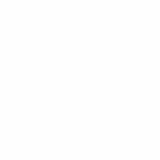

Current loss: 0.17216667076802683


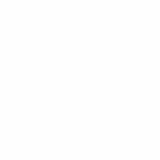

Current loss: 0.17216666461069946


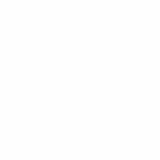

Current loss: 0.1721666601301773


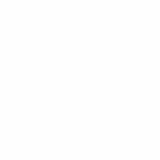

Current loss: 0.17216665747337775


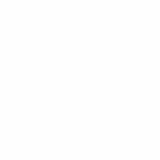

Current loss: 0.17216665539671303


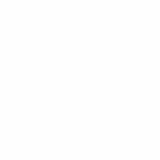

Current loss: 0.17216665288174832


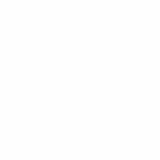

Current loss: 0.1721666493782474


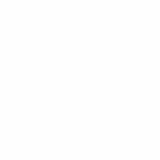

Current loss: 0.17216664649281666


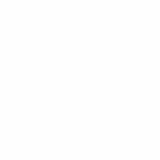

Current loss: 0.17216664529861692


In [14]:
# Define the shape of the parameters
shape_p = qml.StronglyEntanglingLayers.shape(n_layers=4, n_wires=n_qubits)
# shape_p = qml.BasicEntanglerLayers.shape(n_layers=2, n_wires=n_qubits)

# Define the objective function (to be minimized)
def objective(params):
    # print(params)
    original_length = np.prod(shape_p)
    # Extract segments for each set of weights
    weights_p1_flat = params[0 : original_length]
    # print('Param')
    # print(weights_p1_flat)
    # weights_p2_flat = params[original_length : 2*original_length]
    # weights_p3_flat = params[2*original_length : 3*original_length]
    # weights_p4_flat = params[3*original_length : 4*original_length]

    # Reshape each segment
    weights_p1 = weights_p1_flat.reshape(shape_p)
    # print(weights_p1)
    # weights_p2 = weights_p2_flat.reshape(shape_p)
    # weights_p3 = weights_p3_flat.reshape(shape_p)
    # weights_p4 = weights_p4_flat.reshape(shape_p)
    # print('===================')
    image_arr = []
    for i in range(n_qubits):
        arr = circuit(weights_p1,i)
        # largest_elements, indices = find_n_largest_numbers(arr, 1)
        # Convert indices to binary
        # binary_indices = indices_to_binary(indices)
        # print(binary_indices)
        # print(arr)
        image_arr.append(arr)
    image_arr=abs(np.array(image_arr))
    # raise Exception
    # print('==============')
    # print(image_arr)
    # Display the image
    # binary_array_to_png_and_display(image_arr,scale_factor=20)
    # print(prob_image_arr(image_arr,api_key))
    # image_arr = convert_to_int(image_arr)
    # generated_img_feature_map = feature_map(convert_to_int(image_arr))
    generated_img_feature_map = feature_map(image_arr)
    score = cosine_similarity(smiley_pattern_vec,generated_img_feature_map)
    # print(1-score)
    # raise Exception

    
    # print("Largest elements:", largest_elements)
    # print("Indices:", indices)
    # print("Indices in binary:", binary_indices)

    return 1/(score+1)
    # return -score

def callback(params):
    original_length = np.prod(shape_p)
    # Extract segments for each set of weights
    weights_p1_flat = params[0 : original_length]
    weights_p1 = weights_p1_flat.reshape(shape_p)
    image_arr = []
    for i in range(n_qubits):
        arr = circuit(weights_p1,i)
        # largest_elements, indices = find_n_largest_numbers(arr, 1)
        # Convert indices to binary
        # binary_indices = indices_to_binary(indices)
        # print(binary_indices)
        # print(arr)
        image_arr.append(arr)
    image_arr=abs(np.array(image_arr))
    binary_array_to_png_and_display(image_arr,scale_factor=20)
    print("Current loss:", objective(params))
    
# Initialize the weights
weights_p1 = np.random.random(size=shape_p)
# weights_p2 = np.random.random(size=shape_p)
# weights_p3 = np.random.random(size=shape_p)
# weights_p4 = np.random.random(size=shape_p)

# Flatten and concatenate the initial parameters
init_params = np.concatenate([weights_p1.flatten()])
print(qml.draw(circuit)(weights_p1,1))

# Optimize using BFGS algorithm
opt = minimize(objective, init_params, method='BFGS',callback=callback)


In [15]:
print("Optimized Parameters:", opt.x)
print("Optimized Expectation Value:", opt.fun)

original_length = np.prod(shape_p)
params = opt.x
# Extract segments for each set of weights
weights_p1_flat = params[0 : original_length]
# weights_p2_flat = params[original_length : 2*original_length]
# weights_p3_flat = params[2*original_length : 3*original_length]
# weights_p4_flat = params[3*original_length : 4*original_length]

# Reshape each segment
weights_p1 = weights_p1_flat.reshape(shape_p)
# weights_p2 = weights_p2_flat.reshape(shape_p)
# weights_p3 = weights_p3_flat.reshape(shape_p)
# weights_p4 = weights_p4_flat.reshape(shape_p)
# print(circuit_res(weights_p1,weights_p2,weights_p3,weights_p4)

Optimized Parameters: [ 1.30541167e-01 -8.07324021e-06  1.59942110e-01  3.65421284e-01
  2.96308602e-05  9.52884876e-02  1.24051011e-01  1.08395309e-05
  2.34957524e-01  4.10003710e-01 -3.11115982e-06  2.07395447e-01
  4.47193682e-01 -2.61119939e-05  8.42505949e-01  9.16055161e-01
  3.18115005e-05  3.34408633e-01  1.83200135e-01 -1.31440062e-05
  4.63488738e-01  2.59013592e-01  9.89543284e-06  4.61307869e-01
  4.35777012e-01  5.53914836e-06  6.51812842e-01  3.39440558e-01
 -1.03694055e-05  6.91183221e-01  4.29017379e-01 -3.85442533e-05
  7.30881688e-01  1.68156824e-01 -6.27477842e-05  4.77383480e-01
  2.44407878e-01 -1.76590561e-05  5.80888230e-01  3.87399757e-01
 -3.03682975e-04  8.30747485e-01  4.11683038e-01 -3.99271037e-05
  2.52440327e-01  5.92623760e-01  1.24513242e-06  8.04552974e-01
 -1.13360666e-01 -8.50711261e-05  8.40734262e-01  5.07946391e-01
  6.08869975e-05  4.27272894e-01  9.42849547e-01  2.30721172e-05
  4.27112654e-01  1.04689936e+00 -1.12295581e-05  5.49102047e-01
  2

In [16]:
res = circuit(weights_p1,0)
# print(res)

In [17]:

# Example array
arr = res
n = 3

# Find n largest numbers and their indices
largest_elements, indices = find_n_largest_numbers(arr, n)

# Convert indices to binary
binary_indices = indices_to_binary(indices)

print("Largest elements:", largest_elements)
print("Indices:", indices)
print("Indices in binary:", binary_indices)


TypeError: only integer scalar arrays can be converted to a scalar index